In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
#importing train train and test datasets

df_train = pd.read_excel("binary_sib_train.xlsx")
df_train = sklearn.utils.shuffle(df_train)

df_test = pd.read_excel("binary_sib_test.xlsx")
df_test = sklearn.utils.shuffle(df_test)

# Fixing column name, but that doesn't really matter.
df_test = df_test.rename(columns={"spectral+peak":'spectral_peak'})

In [3]:
df_test.head()

,group,duration,spectral_peak,variance,skewness,kurtosis
111,healthy,106.645,6498.414,782.107509035124:3',-0.562,0.495
76,healthy,115.587,4500.208,1078.2028037882958:3',-0.525,4.168
79,healthy,70.176,5124.400,1101.2248759923311:3',-2.772,10.474
82,healthy,115.494,1423.574,1627.4181925064313:3',1.141,0.286
118,healthy,125.550,5417.394,689.2575921535297:3',1.942,4.637


In [4]:
#df_test.head()

In [5]:
# This just changes the labels to 1's and 0's
new_group = {"dysarthria": 1,"healthy": 0}
df_train['group'] = df_train['group'].map(new_group)
df_test['group'] = df_test['group'].map(new_group)

In [6]:
df_train.tail()

,group,duration,spectral_peak,variance,skewness,kurtosis
231,0,173.427,4909.193,1144.8479861930664:3',0.819,-0.332
72,1,154.827,2409.890,813.6341070238246:3',3.059,8.585
149,0,93.621,5723.319,1191.0631329137598:3',-0.395,-1.028
21,1,99.547,663.347,1148.632947973426:3',3.640,12.647
261,0,127.188,4269.173,1452.97982958551:3',0.608,-1.014


In [7]:
# I made a mistake when writing the praat script to extract variance so I just fixed it here.
def clean(x):
    x = x.replace(":", "").replace("'", "").replace(" ", "")
    return float(x)

df_train['variance'] = df_train['variance'].apply(clean)
df_test['variance'] = df_test['variance'].apply(clean)

In [8]:
df_train.head()

,group,duration,spectral_peak,variance,skewness,kurtosis
137,1,190.200,5547.812,1034.387930,-0.236,0.300
156,0,92.903,5209.087,1506.342765,-0.317,-1.438
102,1,119.144,4922.496,1527.264670,0.548,-1.134
269,0,108.479,5156.119,567.023489,1.835,4.681
233,0,131.215,4561.936,584.195393,-0.112,0.404


In [9]:
# This is to separate the features from the labels.
y_train = df_train['group'].values
X_train = df_train.drop('group', axis=1).values

y_test = df_test['group'].values
X_test = df_test.drop('group', axis=1).values

In [10]:
# As you can see, all labels are either a 1 for dysarthria or 0 for healthy
y_train

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0])

In [11]:
print(type(X_train))
print(type(X_train[0]))
print(type(X_train[0][0]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.float64'>


In [12]:
# Each vector represents 1 fricative and is a set of the 5 fricative measurements
X_train

array([[  1.90200000e+02,   5.54781200e+03,   1.03438793e+03,
         -2.36000000e-01,   3.00000000e-01],
       [  9.29030000e+01,   5.20908700e+03,   1.50634277e+03,
         -3.17000000e-01,  -1.43800000e+00],
       [  1.19144000e+02,   4.92249600e+03,   1.52726467e+03,
          5.48000000e-01,  -1.13400000e+00],
       ..., 
       [  9.36210000e+01,   5.72331900e+03,   1.19106313e+03,
         -3.95000000e-01,  -1.02800000e+00],
       [  9.95470000e+01,   6.63347000e+02,   1.14863295e+03,
          3.64000000e+00,   1.26470000e+01],
       [  1.27188000e+02,   4.26917300e+03,   1.45297983e+03,
          6.08000000e-01,  -1.01400000e+00]])

In [13]:
# So we have 273 fricatives for training and 125 for testing.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(273, 5)
(125, 5)
(273,)
(125,)


In [15]:
# Here we import libraries to scale the data and for applying 10-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)
CV = 10
X_train[0]

array([ 0.5606338 ,  0.70476418, -0.26612724, -0.37834791, -0.39366798])

In [16]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(clf2, X_train, y_train, cv=CV, scoring='accuracy')
print(scores)
print("RF mean:", scores.mean())

[ 0.89285714  0.64285714  0.78571429  0.67857143  0.67857143  0.89285714
  0.88888889  0.65384615  0.84615385  0.61538462]
RF mean: 0.75757020757


In [17]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(neigh, X_train, y_train, cv=CV, scoring='accuracy')
print(scores)
print("K mean:", scores.mean())

[ 0.85714286  0.67857143  0.67857143  0.75        0.64285714  0.75
  0.74074074  0.69230769  0.80769231  0.61538462]
K mean: 0.721326821327


In [18]:
from sklearn.svm import SVC
clf = SVC(gamma=1, kernel='rbf', C=1)
scores = cross_val_score(clf, X_train, y_train, cv=CV)
print(scores)
print("SVM mean:", scores.mean())

[ 0.85714286  0.75        0.89285714  0.75        0.64285714  0.85714286
  0.7037037   0.80769231  0.88461538  0.65384615]
SVM mean: 0.779985754986


In [21]:
from sklearn.svm import SVC
clf = SVC(gamma=0.1, kernel='rbf', C=0.1)

clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.81599999999999995

In [30]:
from sklearn import metrics
from sklearn.metrics import f1_score

y_pred = clf.predict(X_test)
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 score (weighted):",f1_score(y_test, y_pred, average='weighted'))
print("F1 score (binary):",f1_score(y_test, y_pred, average='binary'))
print("F1 score (micro):",f1_score(y_test, y_pred, average='micro'))
print("F1 score:",f1_score(y_test, y_pred))

Precision: 0.8
Recall: 0.838709677419
F1 score (weighted): 0.815929325907
F1 score (binary): 0.818897637795
F1 score (micro): 0.816
F1 score: 0.818897637795


[Text(33.0, 0.5, 'observed'), Text(0.5, 15.0, 'predicted')]

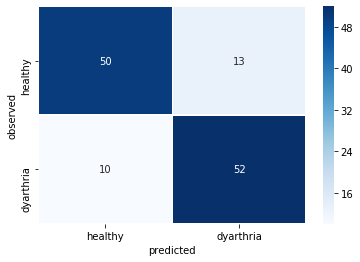

In [24]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap 

cm = confusion_matrix(y_test, y_pred, labels=[0,1])

ax = heatmap(cm, annot=True, cmap="Blues", fmt='d',
            linewidth=.2,
            xticklabels=['healthy','dyarthria'],
            yticklabels=['healthy','dyarthria'])
ax.set(xlabel='predicted', ylabel='observed')